<a href="https://colab.research.google.com/github/Ksenia-90/Data_analysis_algorithms/blob/lesson_1/Lesson_1_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Урок 1. Алгоритм линейной регрессии. Градиентный спуск

In [39]:
import numpy as np
import matplotlib.pyplot as plt

__Задача:__ предсказание баллов ЕГЭ ученика в зависимости от кол-ва лет стажа его репетитора

In [40]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [41]:
X.shape

(2, 10)

In [42]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

Уравнение прямой: $y = a*x + b$

In [43]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

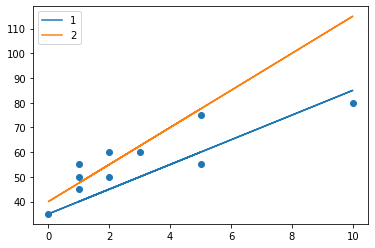

In [44]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

Простая ошибка

In [45]:
err1 = np.sum(y - y_pred1)
err2 = np.sum(y - y_pred2)
err1, err2

(65.0, -60.0)

MAE (Mean Absolute Error)

In [46]:
mae_1 = np.sum(np.abs(y - y_pred1)) / 10
mae_2 = np.sum(np.abs(y - y_pred2)) / 10
mae_1, mae_2

(8.5, 9.0)

MSE (Mean Squared Error)

In [47]:
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

Метод наименьших квадратов (МНК)

In [48]:
X.shape

(2, 10)

In [49]:
X.T.shape

(10, 2)

In [50]:
all(X @ y == np.dot(X,y))

True

In [51]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [52]:
y_pred3 = W[0] * X[0] + W[1] * X[1]

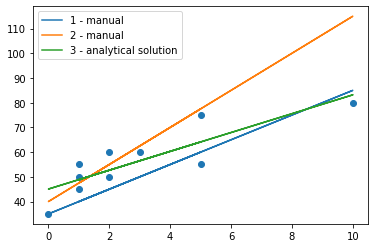

In [53]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [54]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [55]:
calc_mae(y, y_pred1), calc_mse(y, y_pred1)

(8.5, 97.5)

In [56]:
calc_mae(y, y_pred2), calc_mse(y, y_pred2)

(9.0, 188.75)

In [57]:
calc_mae(y, y_pred3), calc_mse(y, y_pred3)

(5.787499999999998, 43.96875)

Градиентный спуск

In [58]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [59]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [60]:
W[0], W[0] - g

(45.0625, 45.29125)

### Д/З

1. Подберите скорость обучения (alpha) и количество итераций

In [61]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(W.shape[0]):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
Iteration #10: W_new = [ 7.0011236 10.6169007], MSE = 738.65
Iteration #20: W_new = [10.3486292  10.10603105], MSE = 622.03
Iteration #30: W_new = [13.38789582  9.55618391], MSE = 525.24
Iteration #40: W_new = [16.16088505  9.05336203], MSE = 444.66
Iteration #50: W_new = [18.69110735  8.59454545], MSE = 377.58
Iteration #60: W_new = [20.99981865  8.17589626], MSE = 321.72
Iteration #70: W_new = [23.10641138  7.79389815], MSE = 275.22
Iteration #80: W_new = [25.02858024  7.44534246], MSE = 236.5
Iteration #90: W_new = [26.78247081  7.12730145], MSE = 204.27


Решение:

In [62]:
def gradient_descent(alpha, iterations, W, X=X, y=y):
    n = X.shape[1]
    err = np.inf
    for i in range(iterations):
        y_pred = np.dot(W, X)
        err_new = calc_mse(y, y_pred)
        if err_new < err:
            err = err_new
            for j in range(W.shape[0]):
                W[j] -= alpha * (1/n * 2 * np.sum(X[j] * (y_pred - y))) 
        else:
            return i-1, W, err
    return i, W, err

In [63]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def calc_mse(y, y_pred):
    error = np.mean((y - y_pred)**2)
    return error

In [64]:
min_err = np.inf
min_coef = ()

for alpha in [1e-1, 1e-2, 1e-3, 1e-4]:
    for iters in [1e3, 1e4, 1e5, 1e6]:
        W = np.array([1, 0.5])
        num, wi, err = gradient_descent(alpha, int(iters), W)
        print(f'Альфа = {alpha}, количество итераций = {iters}. Ошибка: {err}')
        if err < min_err:
            min_err = err
            min_coef = (alpha, iters)

print(f'Минимальная ошибка {min_err} достигается при коэфициентах {min_coef}')

Альфа = 0.1, количество итераций = 1000.0. Ошибка: 3047.75
Альфа = 0.1, количество итераций = 10000.0. Ошибка: 3047.75
Альфа = 0.1, количество итераций = 100000.0. Ошибка: 3047.75
Альфа = 0.1, количество итераций = 1000000.0. Ошибка: 3047.75
Альфа = 0.01, количество итераций = 1000.0. Ошибка: 43.96875935998757
Альфа = 0.01, количество итераций = 10000.0. Ошибка: 43.96875000000084
Альфа = 0.01, количество итераций = 100000.0. Ошибка: 43.96875000000084
Альфа = 0.01, количество итераций = 1000000.0. Ошибка: 43.96875000000084
Альфа = 0.001, количество итераций = 1000.0. Ошибка: 178.68218642130688
Альфа = 0.001, количество итераций = 10000.0. Ошибка: 43.96875992746433
Альфа = 0.001, количество итераций = 100000.0. Ошибка: 43.96875000001047
Альфа = 0.001, количество итераций = 1000000.0. Ошибка: 43.96875000001047
Альфа = 0.0001, количество итераций = 1000.0. Ошибка: 740.9067599479888
Альфа = 0.0001, количество итераций = 10000.0. Ошибка: 178.56189362246133
Альфа = 0.0001, количество итераций

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

In [65]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X * (y_pred - y)))
    W_pred = W
    
    if i % 10 == 0:
        
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [5.85 5.35], MSE = 3047.75
Iteration #10: W_new = [11.0965715 10.5965715], MSE = 597.49
Iteration #20: W_new = [11.10415569 10.60415569], MSE = 597.49
Iteration #30: W_new = [11.10416665 10.60416665], MSE = 597.49
Iteration #40: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #50: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #60: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #70: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #80: W_new = [11.10416667 10.60416667], MSE = 597.49
Iteration #90: W_new = [11.10416667 10.60416667], MSE = 597.49


Решение:

In [66]:
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= (alpha  * (1/n * 2 * np.dot((y_pred  - y), X.T)))
    W_pred = W
    
    if i % 10 == 0:
        
        print(f'Итераций #{i}: W_new(Подобные веса)= {W}, MSE(ошибка) = {round(err,2)}')

    last_err = err

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Итераций #0: W_new(Подобные веса)= [2.08 4.27], MSE(ошибка) = 3047.75
Итераций #10: W_new(Подобные веса)= [ 7.0011236 10.6169007], MSE(ошибка) = 738.65
Итераций #20: W_new(Подобные веса)= [10.3486292  10.10603105], MSE(ошибка) = 622.03
Итераций #30: W_new(Подобные веса)= [13.38789582  9.55618391], MSE(ошибка) = 525.24
Итераций #40: W_new(Подобные веса)= [16.16088505  9.05336203], MSE(ошибка) = 444.66
Итераций #50: W_new(Подобные веса)= [18.69110735  8.59454545], MSE(ошибка) = 377.58
Итераций #60: W_new(Подобные веса)= [20.99981865  8.17589626], MSE(ошибка) = 321.72
Итераций #70: W_new(Подобные веса)= [23.10641138  7.79389815], MSE(ошибка) = 275.22
Итераций #80: W_new(Подобные веса)= [25.02858024  7.44534246], MSE(ошибка) = 236.5
Итераций #90: W_new(Подобные веса)= [26.78247081  7.12730145], MSE(ошибка) = 204.27


*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

In [67]:
error_min = np.inf
error = 1e6
epsila = 1e-5
i = 0
while error_min - error > epsila:
    y_pred = np.dot(W, X)
    error, error_min = calc_mse(y, y_pred), error
    W -= (alpha  * (1/n * 2 * np.dot((y_pred  - y), X.T)))
    i += 1
     
print(f'Iteration = {i}, W_new = {W}, MSE = {round(err,2)}')

Iteration = 679, W_new = [45.02904272  3.81856696], MSE = 179.9


4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.

ДЗ1 Lesson_1_HW

1. Подберите скорость обучения (alpha) и количество итераций

*2. В этом коде мы избавляемся от итераций по весам, но тут есть ошибка, исправьте ее

*3. Вместо того, чтобы задавать количество итераций, задайте условие остановки алгоритма - когда ошибка за итерацию начинает изменяться ниже определенного порога (упрощенный аналог параметра tol в линейной регрессии в sklearn).

4. Сделайте выводы по результатам работы с GD : что повышает качество результата, что понижает.